# Feature Engineering

In [1]:
import sys
import os
sys.path.append('../scripts')
from data_loader import *
from feature_engineering import *
from eda import *

## Load Dataset

In [2]:
# path to the CSV file
filename = 'cleaned_df.parquet'
path = os.path.join('..', 'data/processed', filename)

# Load dataset
cleaned_df = load_data(path)
cleaned_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


## Extracting RFMS Features

Recency(R): Time since a customer's last purchase or transaction.

Frequency(F): Number of purchases or transactions a customer has made.

Monetary(M): Total amount of money a customer has spent with the business.

Standard Deviation(S): Variability or dispersion of a customer's purchase amounts.

In [3]:
df = create_rfms_features(cleaned_df)
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Recency,Frequency,Monetary,StdDev
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,5,66,2377.030303,3122.305223
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,0,30893,-898.270725,1845.782877
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,81,2,500.000000,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,5,26,9653.846154,19324.540611
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15 03:35:10+00:00,2,0,90,1,2000.000000,0.000000


In [4]:
rfms = ['Recency',	'Frequency',	'Monetary',	'StdDev']
rfms_df = df[rfms]
rfms_df.head()

,Recency,Frequency,Monetary,StdDev
0,5,66,2377.030303,3122.305223
1,0,30893,-898.270725,1845.782877
2,81,2,500.000000,0.000000
3,5,26,9653.846154,19324.540611
5,90,1,2000.000000,0.000000


In [6]:
rfms_df.describe()

,Recency,Frequency,Monetary,StdDev
count,3615.000000,3615.000000,3615.000000,3615.000000
mean,30.136653,26.388105,9412.822418,4910.394012
std,26.942500,521.484360,20051.955695,12182.423691
min,0.000000,1.000000,-157142.857143,0.000000
25%,5.000000,2.000000,1614.358974,0.000000
50%,23.000000,4.000000,5000.000000,1804.670590
75%,53.000000,14.000000,9279.220779,3959.076535
max,90.000000,30893.000000,300000.000000,142200.000000


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>,
        <Axes: title={'center': 'StdDev'}>]], dtype=object)

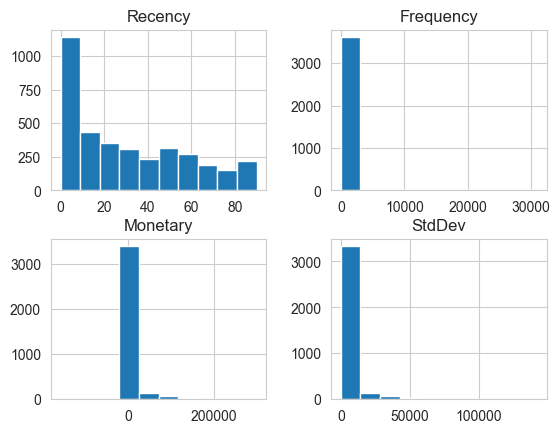

In [7]:
rfms_df.hist()

## Outliers detection in RFMS features

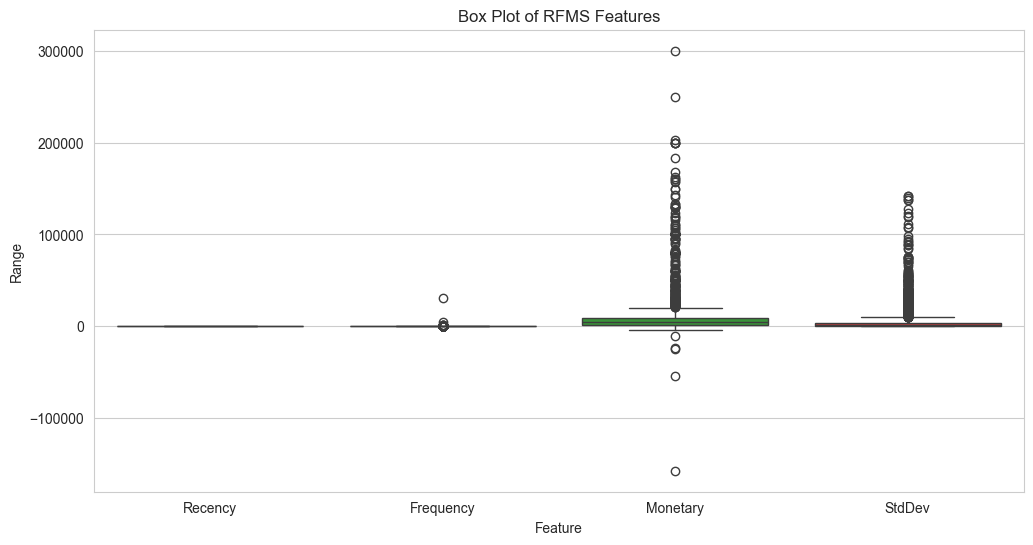

In [5]:
outlier_indices = detect_rfms_outliers(rfms_df)

## MinMaxScaler Transformation of RFMS Feature

In [5]:
scaled_df = scale_features(rfms_df)
scaled_df.describe()

,Recency,Frequency,Monetary,StdDev
count,3615.000000,3615.000000,3615.000000,3615.000000
mean,0.334852,0.000822,0.364341,0.034532
std,0.299361,0.016881,0.043864,0.085671
min,0.000000,0.000000,0.000000,0.000000
25%,0.055556,0.000032,0.347281,0.000000
50%,0.255556,0.000097,0.354687,0.012691
75%,0.588889,0.000421,0.364048,0.027842
max,1.000000,1.000000,1.000000,1.000000


In [10]:
scaled_df.head()

,Recency,Frequency,Monetary,StdDev
0,0.055556,0.002104,0.348950,0.021957
1,0.000000,1.000000,0.341785,0.012980
2,0.900000,0.000032,0.344844,0.000000
3,0.055556,0.000809,0.364868,0.135897
4,1.000000,0.000000,0.348125,0.000000


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>,
        <Axes: title={'center': 'StdDev'}>]], dtype=object)

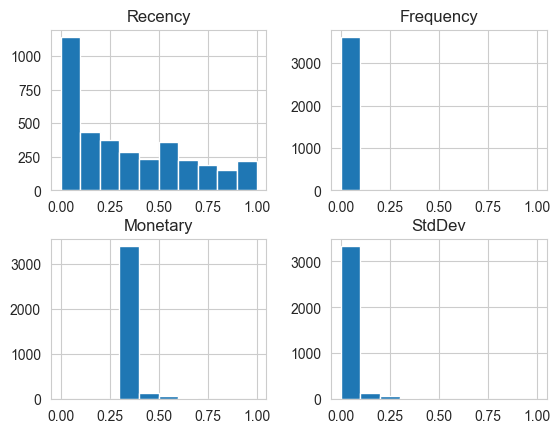

In [6]:
scaled_df.hist()

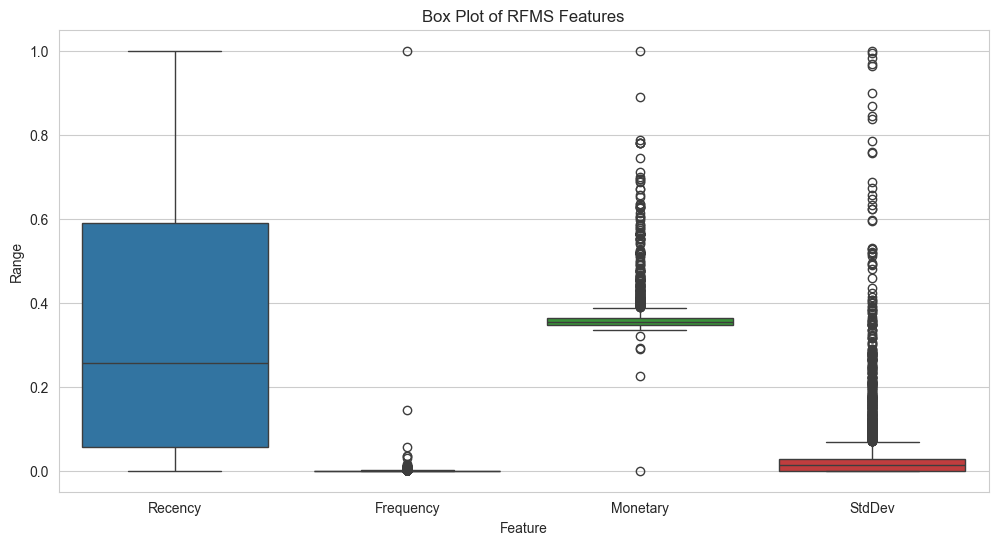

In [7]:
outlier_indices = detect_rfms_outliers(scaled_df)

## Visualizing in RFMS Space

### Comparative Scoring

In [6]:
bn_rfms_df =  assign_comparative_binary_score(scaled_df)
bn_rfms_df.head()

,Recency,Frequency,Monetary,StdDev,<Recency_avg,>Frequency_avg,>Monetary_avg,>StdDev_avg
0,0.055556,0.002104,0.348950,0.021957,1,1,0,0
1,0.000000,1.000000,0.341785,0.012980,1,1,0,0
2,0.900000,0.000032,0.344844,0.000000,0,0,0,0
3,0.055556,0.000809,0.364868,0.135897,1,0,1,1
4,1.000000,0.000000,0.348125,0.000000,0,0,0,0


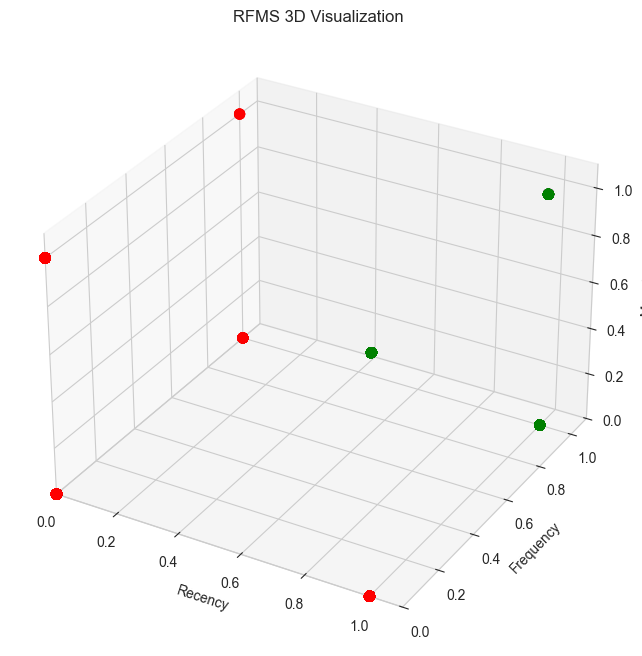

In [10]:
visualize_rfms(classified_df)

### User classification

In [7]:
classified_df = apply_classification(bn_rfms_df)
classified_df.head()

,Recency,Frequency,Monetary,StdDev,<Recency_avg,>Frequency_avg,>Monetary_avg,>StdDev_avg,Classification,Binary_Classification
0,0.055556,0.002104,0.348950,0.021957,1,1,0,0,Low-risk,0
1,0.000000,1.000000,0.341785,0.012980,1,1,0,0,Low-risk,0
2,0.900000,0.000032,0.344844,0.000000,0,0,0,0,High-risk,1
3,0.055556,0.000809,0.364868,0.135897,1,0,1,1,Low-risk,0
4,1.000000,0.000000,0.348125,0.000000,0,0,0,0,High-risk,1


In [9]:
classified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Recency                3615 non-null   float64
 1   Frequency              3615 non-null   float64
 2   Monetary               3615 non-null   float64
 3   StdDev                 3615 non-null   float64
 4   <Recency_avg           3615 non-null   int32  
 5   >Frequency_avg         3615 non-null   int32  
 6   >Monetary_avg          3615 non-null   int32  
 7   >StdDev_avg            3615 non-null   int32  
 8   Classification         3615 non-null   object 
 9   Binary_Classification  3615 non-null   int64  
dtypes: float64(4), int32(4), int64(1), object(1)
memory usage: 226.1+ KB


## Perform Weight of Evidence (WoE) binning 

In [12]:
# Example usage:
features = ['Recency', 'Frequency', 'Monetary', 'StdDev', '<Recency_avg', '>Frequency_avg', '>Monetary_avg', '>StdDev_avg']
df_woe, woe_dict, iv_dict = woe_binning(classified_df, features, 'Binary_Classification')

C:\Users\Administrator\Downloads\10-Academy\week-6\AiML-credit-risk---loan-optimization-ml\notebooks\../scripts\feature_engineering.py:323: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum'])
C:\Users\Administrator\Downloads\10-Academy\week-6\AiML-credit-risk---loan-optimization-ml\notebooks\../scripts\feature_engineering.py:323: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum'])
C:\Users\Administrator\Downloads\10-Academy\week-6\AiML-credit-risk---loan-optimization-ml\notebooks\../scripts\feature_engineer

In [13]:
df_woe.head()

,Recency,Frequency,Monetary,StdDev,<Recency_avg,>Frequency_avg,>Monetary_avg,>StdDev_avg,Classification,Binary_Classification
0,-0.863913,-3.442285,-0.145123,-0.024367,9.059420e-14,9.059420e-14,9.059420e-14,9.059420e-14,Low-risk,0
1,-1.743472,-3.442285,2.724225,1.081997,9.059420e-14,9.059420e-14,9.059420e-14,9.059420e-14,Low-risk,0
2,20.961183,1.121144,2.724225,1.267608,9.059420e-14,9.059420e-14,9.059420e-14,9.059420e-14,High-risk,1
3,-0.863913,-1.228793,-0.492849,-1.626724,9.059420e-14,9.059420e-14,9.059420e-14,9.059420e-14,Low-risk,0
4,20.961183,1.121144,0.396039,1.267608,9.059420e-14,9.059420e-14,9.059420e-14,9.059420e-14,High-risk,1


## Extract Time Features

In [ ]:
processed_data = extract_time_features(processed_data)
processed_data.head()
processed_data.info()

In [ ]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

## Handle Missing Values

In [ ]:
processed_data = handle_missing_values(processed_data)
processed_data.info()

In [ ]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

In [ ]:
non_fraud_df = processed_data[processed_data['FraudResult'] == 1.0]
print(f"Number of fraudulent transactions: {len(non_fraud_df)}")

In [ ]:
print(processed_data['FraudResult'].value_counts())

In [ ]:
processed_data['FraudResult'].unique()

## Encode Categorical Variables

In [ ]:
processed_data = encode_categorical_variables(processed_data)
processed_data.info()

In [ ]:
print(processed_data['FraudResult'].value_counts())

In [ ]:
processed_data['FraudResult'].unique()

## Normalize/Standardize Numerical Features

In [ ]:
processed_data = normalize_and_standardize_numerical_features(processed_data)

In [ ]:
processed_data['FraudResult'].unique()

In [ ]:
processed_data.head()

In [ ]:
processed_data.info()

In [ ]:
processed_data

In [ ]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

In [ ]:
print(processed_data['FraudResult'].value_counts())

In [ ]:
processed_data['FraudResult'].unique()

## Save the the processed dataset

In [ ]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'featured')
filename = 'featured_df.parquet'

output_path = save_data(processed_data, output_folder, filename)